#Apple AirTag - Sentiment Analysis

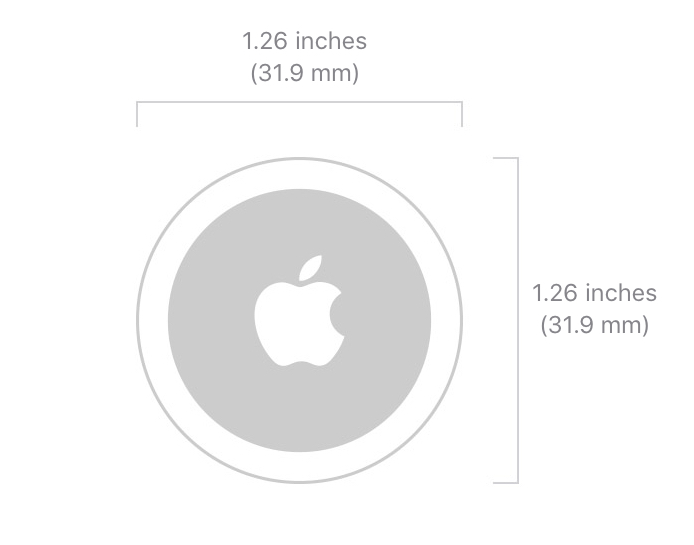

#Tweets scraping

In order to get the data we use the library Tweepy,an easy-to-use Python library for accessing the Twitter API.

The Twitter API can be used to programmatically retrieve and analyze Twitter data, as well as build for the conversation on Twitter.
Over the years, the Twitter API has grown by adding additional levels of access for developers and academic researchers to be able to scale their access to enhance and research the public conversation. 
Recently, we released the Twitter API v2. The Twitter API v2 includes a modern foundation, new and advanced features, and quick onboarding to Essential access.


---



**Get your API:**

*  Sign up for a developer account
*  Next you will create a Project and an associated developer App during the onboarding process, which will provide you a set of credentials that you will use to authenticate all requests to the API.
*   Once you have access and have created a Project and App, you will be able to find or generate the following credentials within your developer App:


  1.   API Key and Secret: Essentially the username and password for your App. You will use these to authenticate requests that require OAuth 1.0a User Context
  2.   A set of user Access Tokens: In general, Access Tokens represent the user that you are making the request on behalf of. The ones that you can generate via the developer portal represent the user that owns the App.

  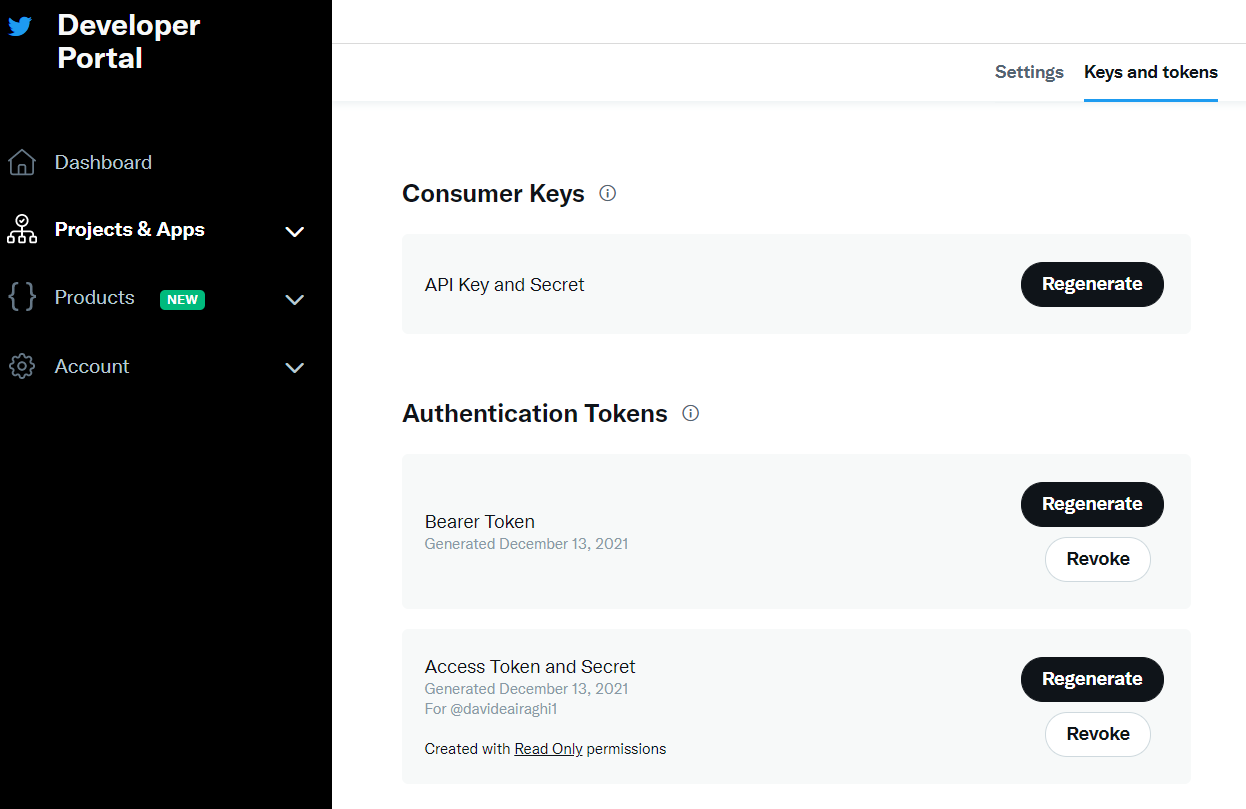

### Install the packages

In [ ]:
!pip install tweepy -U -q
!pip install python-dotenv -U -q

     |████████████████████████████████| 65 kB 2.6 MB/s 


In [ ]:
import tweepy
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytz
import time
import warnings
import datetime
from datetime import date
from tweepy import OAuthHandler
from dotenv import load_dotenv

In [ ]:
# getting automatic reloading and inline plotting for the entire notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext google.colab.data_table

Load enviroments variables to not expose secret credentials

In [ ]:
load_dotenv('/content/vars (1).env')

True

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving vars (1).env to vars (1).env
User uploaded file "vars (1).env" with length 302 bytes


In [ ]:
consumer_key_var = os.getenv('CONSUMER_KEY')
consumer_secret_var = os.getenv('CONSUMER_SECRET')
access_token_var = os.getenv('ACCESS_TOKEN')
access_secret_var = os.getenv('ACCESS_SECRET')
data_pane_token = os.getenv('DATA_PANE_TOKEN')

In [ ]:
consumer_key_var = 'NUeEWmj2egJdMtSur5KVdBZDJ'
consumer_secret_var = 'ggSriQrdgWLe6objat7aABSkLyWfVcMjvGzkz4DMWRydbyIrrT'
access_token_var = '1272646016337149954-VLKwMIsouUodeq1KP9WozgWn8oAge8'
access_secret_var = 'uXmeHxr7ac6g7GGdRfSxgTFdtvD9qJ9QqCn0UiWZC0ROM'
data_pane_token = 'f4d00658acddf65a17bd21cbb1e8c34492f298ff'

In [ ]:
consumer_key = consumer_key_var
consumer_secret = consumer_secret_var
access_token = access_token_var
access_secret = access_secret_var
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

### Setting the cursor to scrape the tweets


*   q = you can set the parameters of the search using keywords,sentences or hashtags and filter out something that you don't consider useful (e.g retweets) 
*   tweet_mode: full text of the twitter, no truncation
*   lang: you can choose a language of the tweets
*   return a json



In [ ]:
searched_tweets = []

tweets_list = tweepy.Cursor(api.search_tweets, q="airtag -filter:retweets",tweet_mode='extended', lang='en').items()

for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'tweet' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    searched_tweets.append(line)

In [ ]:
df = pd.DataFrame(searched_tweets)
df.to_csv('Tweet-Apple AirTag.csv')
df.head()

,tweet,favourite_count,retweet_count,created_at
0,🤓🤔👍 #knownews #tech Apple’s New App Helps Andr...,0,0,2021-12-13 21:17:35+00:00
1,Apple’s New App Helps Android Users Detect Unw...,0,0,2021-12-13 21:17:25+00:00
2,Apple’s New App Helps Android Users Detect Unw...,0,0,2021-12-13 21:15:59+00:00
3,Apple’s New App Helps Android Users Detect Unw...,0,0,2021-12-13 21:11:30+00:00
4,Apple releases Android app to help find sneaky...,0,0,2021-12-13 21:06:28+00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4643 entries, 0 to 4642
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet            4643 non-null   object        
 1   favourite_count  4643 non-null   int64         
 2   retweet_count    4643 non-null   int64         
 3   created_at       4643 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 145.2+ KB


#Text preprocessing

All fresh data should be processed before the consumption: text data is not an exception.

Especially tweets could be messy with 
- hashtags
- emoticons 
- links
- mentions of other users

In order to achieve a reasonable level of data quality the following task are perfomed:


1.   Clean raw tweets with **tweet-preprocessor** library
2.   Remove punctuation marks
3.   Tokenization is the splitting of a sentence into words. The sentence “This is an example.” can be tokenized like [“This”, “is”, “an”, “example”, “.”]
4.   Stopwords are the words that are commonly used and they don’t contribute to the meaning of a sentence such as “a”, “an”, “the”, “on”, “in” and so forth.
5.  Lemmatization is the process of reducing a word to its root form. This root form called a lemma. For example, the lemma of words running runs, and ran is run


### Install the packages

In [ ]:
!pip install tweet-preprocessor -q
!pip install nltk -q

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import preprocessor as p
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def clean_tweet(row):
  tweet = row['tweet']
  tweet_cleaned = ''
  try:
     tweet_cleaned = p.clean(tweet)
  except:
    print(tweet)
  return tweet_cleaned
#------------------------------------------------------------------------------
def process_text(row):
    review = row['tweet_cleaned']
    lemmatizer = WordNetLemmatizer()
    stop_w = stopwords.words('english')
    a = set(stop_w)
    tokens = nltk.word_tokenize(review.lower())
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    stop_words = [w for w in token_words if not w in a]
    meaningful_words = [lemmatizer.lemmatize(word) for word in stop_words]
    return meaningful_words 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Twitter - Apple AirTag/Tweet-Apple AirTag.csv',index_col=0)

In [ ]:
df_raw = df.copy()

### Text cleaning

In [ ]:
df['tweet_cleaned'] = df.apply(clean_tweet, axis=1)
df['tweet_preprocessed'] = df.apply(process_text, axis=1)
df.head()

,tweet,favourite_count,retweet_count,created_at,tweet_cleaned,tweet_preprocessed
0,"@Apple hi Apple, can you integrate #airtag te...",0.0,0,2021-05-17 05:47:00,"hi Apple, can you integrate technology in the ...","[hi, apple, integrate, technology, charging, c..."
1,Why the FUCK do I have to put an airtag on my ...,0.0,0,2021-05-17 05:36:28,Why the FUCK do I have to put an airtag on my ...,"[fuck, put, airtag, airpods, omfg]"
2,@SnazzyQ But what if the AirTag is on your App...,0.0,0,2021-05-17 05:32:54,But what if the AirTag is on your Apple TV rem...,"[airtag, apple, tv, remote, hiding, inside, sofa]"
3,Video coming soon! #AirTag https://t.co/M7YxOA...,0.0,0,2021-05-17 05:32:28,Video coming soon!,"[video, coming, soon]"
4,Giving ur gf a airtag necklace @Apple,0.0,0,2021-05-17 05:32:26,Giving ur gf a airtag necklace,"[giving, ur, gf, airtag, necklace]"


### List of most 50 frequent words

In [ ]:
words_list = []
for index,tr in df.iterrows():
  for x in list(tr['tweet_preprocessed']):
    words_list.append(x)

In [ ]:
fdist = FreqDist(words_list)
ds_freq_words = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
ds_top_50_freq_words = ds_freq_words.sort_values(by=['Frequency'],ascending=False)[:50]
ds_top_50_freq_words_cln = ds_top_50_freq_words.loc[(ds_top_50_freq_words['Word'] != 'airtag')]
ds_top_50_freq_words_cln.sort_values(by=['Frequency'],ascending=False)

,Word,Frequency
1,apple,1972
147,hacked,519
82,find,516
149,researcher,450
148,security,442
26,new,386
99,airtags,301
79,key,291
5,case,284
175,one,262


In [ ]:
frequency_word_plot = px.bar(ds_top_50_freq_words_cln, 
             x='Frequency',
             y='Word',
             orientation = 'h', 
             template = 'plotly_white',
             color = 'Frequency',
             range_color=[50, 600])
frequency_word_plot.show()

### WordCloud

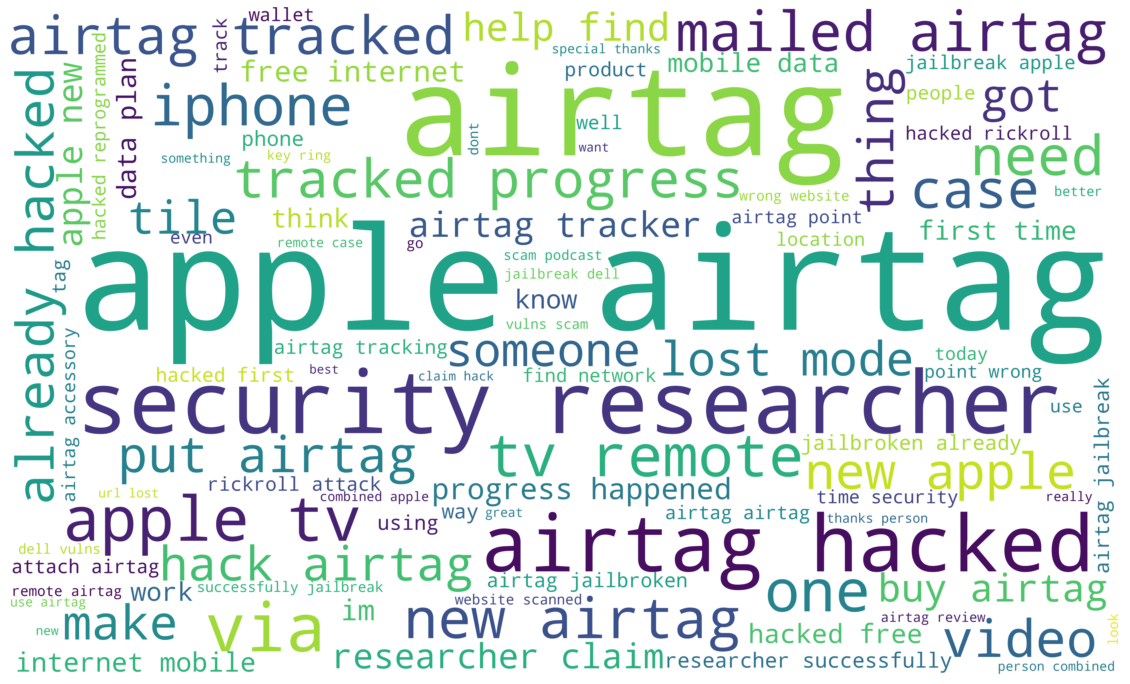

In [ ]:
listToStr = ' '.join([str(elem) for elem in words_list])
wordcloud = WordCloud(width=5000, height=3000, max_words= 100,background_color ='white').generate(listToStr)
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#save image
wordcloud.to_file("/content/wordcloud_airtag.jpeg")

# Sentiment Analysis with TextBlob

Sentiment analysis, also called opinion mining or emotion AI, is the process of determining whether a piece of writing is positive, negative, or neutral. A common use case for this technology is to discover how people feel about a particular topic. Sentiment analysis is widely applied to reviews and social media for a variety of applications.


There can be two approaches to sentiment analysis:
1. Lexicon-based methods
2. Machine Learning-based methods.

Lexicon based methods define a list of positive and negative words, with a valence — (eg ‘nice’: +2, ‘good’: +1, ‘terrible’: -1.5 etc). The algorithm looks up a text to find all known words. It then combines their individual results by summing or averaging. Some extensions can check some grammatical rules, like negation or sentiment modifier (like the word “but”, which weights sentiment values in text differently, to emphasize the end of text).


For lexicon-based approaches, a sentiment is defined by its semantic orientation and the intensity of each word in the sentence. This requires a pre-defined dictionary classifying negative and positive words. Generally, a text message will be represented by bag of words. After assigning individual scores to all the words, final sentiment is calculated by some pooling operation like taking an average of all the sentiments.



---


**TextBlob returns polarity and subjectivity of a sentence:**

Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a 

*   Polarity lies between [-1,1]. 1 defines the most positive rank and -1 defines the higher values of negativity.
*   Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.



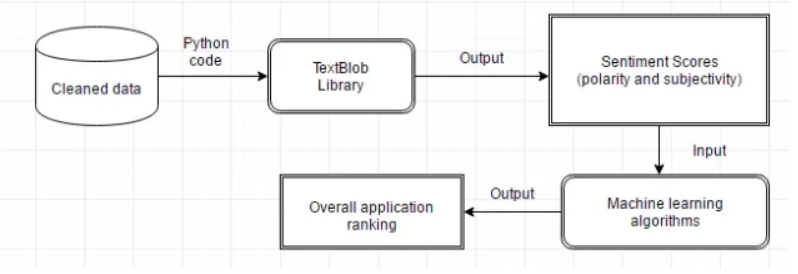

### Install the packages

In [ ]:
!pip install --upgrade textblob -q

In [ ]:
import numpy as np
import seaborn as sb
from textblob import TextBlob

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
#-----------------------------------------------------------------------------------
# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
#-----------------------------------------------------------------------------------   
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getPolarityAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 elif score > 0:
  return 'Positive'
#-----------------------------------------------------------------------------------   
# Create a function 
def getSubjectivityAnalysis(score):
 if score < 0.50:
  return 'Objective'
 elif score == 0.50:
  return 'Neutral'
 elif score > 0.50:
  return 'Subjective'
#----------------------------------------------------------------------------------   
# Create a function to allocate the sentiment in a specific quadrant
def assignQuadrant(pol,subj):
    return pol + " and " + subj

### Get Polarity and Subjectivity with TextBlob

In [ ]:
df['subjectivity'] = df['tweet_cleaned'].apply(getSubjectivity)
df['polarity'] = df['tweet_cleaned'].apply(getPolarity)
df['polarity_analysis'] = df['polarity'].apply(getPolarityAnalysis)
df['subjectivity_analysis'] = df['subjectivity'].apply(getSubjectivityAnalysis)
df['type'] = np.vectorize(assignQuadrant)(df['polarity_analysis'], df['subjectivity_analysis'])
df.head()

,tweet,favourite_count,retweet_count,created_at,tweet_cleaned,tweet_preprocessed,subjectivity,polarity,polarity_analysis,subjectivity_analysis,type
0,"@Apple hi Apple, can you integrate #airtag te...",0.0,0,2021-05-17 05:47:00,"hi Apple, can you integrate technology in the ...","[hi, apple, integrate, technology, charging, c...",0.0,0.0,Neutral,Objective,Neutral and Objective
1,Why the FUCK do I have to put an airtag on my ...,0.0,0,2021-05-17 05:36:28,Why the FUCK do I have to put an airtag on my ...,"[fuck, put, airtag, airpods, omfg]",0.6,-0.4,Negative,Subjective,Negative and Subjective
2,@SnazzyQ But what if the AirTag is on your App...,0.0,0,2021-05-17 05:32:54,But what if the AirTag is on your Apple TV rem...,"[airtag, apple, tv, remote, hiding, inside, sofa]",0.2,-0.1,Negative,Objective,Negative and Objective
3,Video coming soon! #AirTag https://t.co/M7YxOA...,0.0,0,2021-05-17 05:32:28,Video coming soon!,"[video, coming, soon]",0.0,0.0,Neutral,Objective,Neutral and Objective
4,Giving ur gf a airtag necklace @Apple,0.0,0,2021-05-17 05:32:26,Giving ur gf a airtag necklace,"[giving, ur, gf, airtag, necklace]",0.0,0.0,Neutral,Objective,Neutral and Objective


#### Count of polarity results

In [ ]:
frequency_pol = df.groupby(['polarity_analysis']).size().reset_index(name='cnt')
frequency_pol.head()

,polarity_analysis,cnt
0,Negative,619
1,Neutral,1965
2,Positive,2060


#### Count of subjectivity results

In [ ]:
frequency_sub = df.groupby(['subjectivity_analysis']).size().reset_index(name='cnt')
frequency_sub.head()

,subjectivity_analysis,cnt
0,Neutral,193
1,Objective,3087
2,Subjective,1364


#### Donuts

In [ ]:
donut_cnt = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
donut_cnt.add_trace(go.Pie(labels=frequency_pol.polarity_analysis, values=frequency_pol.cnt,marker_colors=px.colors.sequential.Plasma_r,textinfo='label+percent',title = 'Polarity'),1, 1)
donut_cnt.add_trace(go.Pie(labels=frequency_sub.subjectivity_analysis, values=frequency_sub.cnt,marker_colors=px.colors.sequential.Plasma,textinfo='label+percent',title = 'Subjectivity'),1, 2)

# Use `hole` to create a donut-like pie chart
donut_cnt.update_traces(hole=.5, hoverinfo="label+percent")

donut_cnt.update_layout(title_text = 'Size of sentiments results and subjectivity results')
donut_cnt.update_layout(showlegend=False)

donut_cnt.show()

#### Chart to perform quadrant analysis

In [ ]:
df_quadrant = df.loc[(df['polarity_analysis'] != 'Neutral') & (df['subjectivity_analysis'] != 'Neutral')]

In [ ]:
colorscales = px.colors.named_colorscales()
quadrant_scatter_plot = px.scatter(df_quadrant, 
                 x="polarity", 
                 y="subjectivity", 
                 color="type",
                 color_discrete_sequence=px.colors.sequential.Plasma_r,
                 hover_data=['tweet'],
                 template = 'plotly_white',
                 title="Quadrant chart focused on subjectivity and polarity (neutral excluded)")
quadrant_scatter_plot.show()

 #### Calculate BigNumber

In [ ]:
cntPos = frequency_pol[frequency_pol["polarity_analysis"] == 'Positive']
cntNeutral = frequency_pol[frequency_pol["polarity_analysis"] == 'Neutral']
cntNegative = frequency_pol[frequency_pol["polarity_analysis"] == 'Negative']

# Create and publish the report with DataPane

Datapane is an API for people who analyze data in Python and need a way to share their results. It provides a way to create reports programmatically from components that wrap around the common objects in analyses, such as:
- Pandas DataFrames
- Plots from Python visualization libraries such as Plotly, Bokeh, Altair, and Folium
- Markdown

Once created, reports can be published on the web, dynamically generated in the cloud, or embedded into your own application, where data can be explored, and visualizations can be used interactively

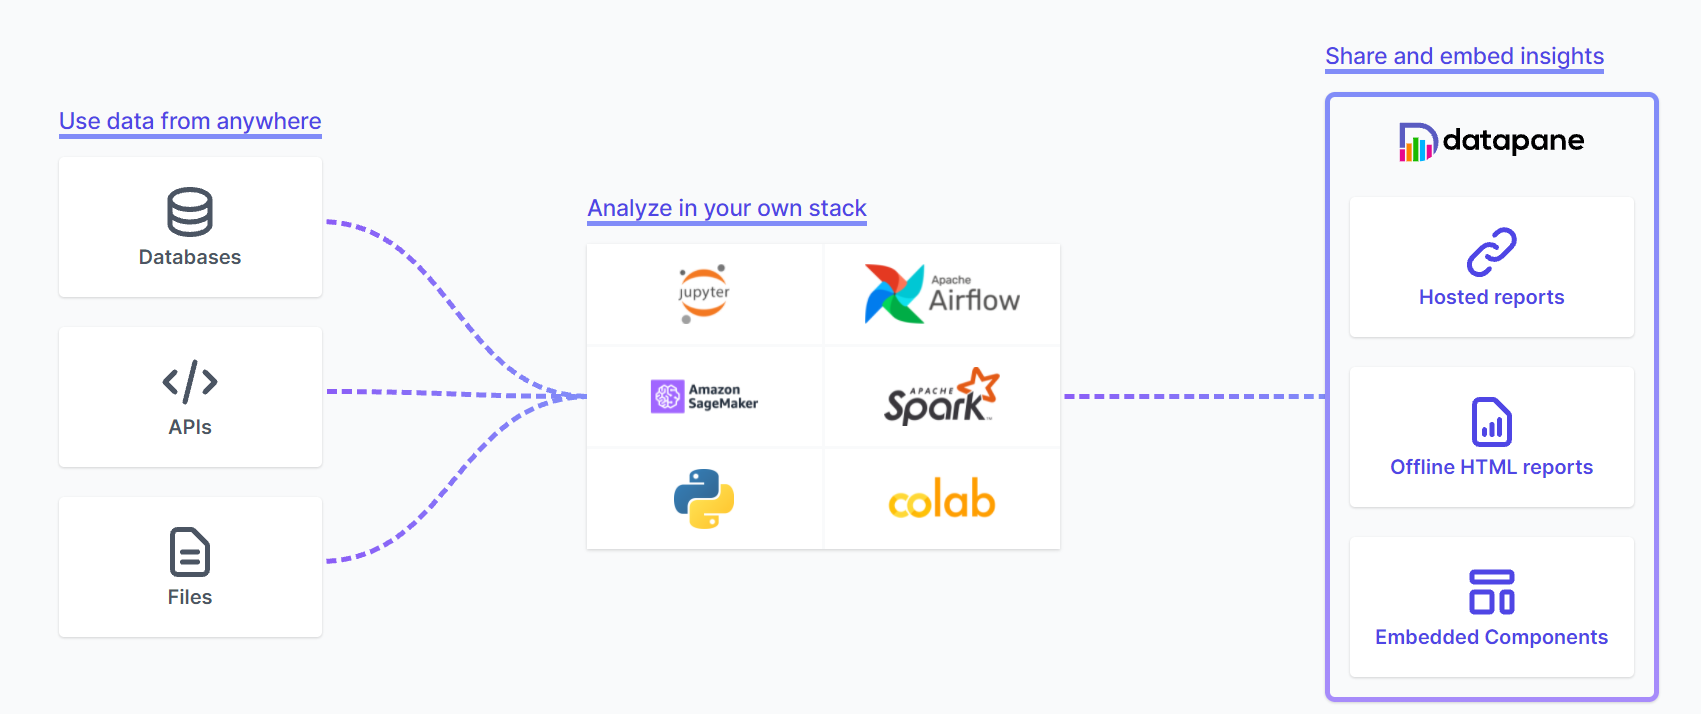

In [ ]:
!pip3 install --upgrade -q datapane

In [ ]:
import datapane as dp

In [ ]:
#login
dp.login(token=data_pane_token, server='https://datapane.com/')

Connected successfully to https://datapane.com as airaghidavide


'airaghidavide'

In [ ]:
#build the report
r = dp.Report(
  dp.Text('Apple AirTag sentiment analysis'), #add description to the report
  dp.Select(blocks=[
        dp.DataTable(df_raw, label='Dataset'),
        dp.Table(df_raw.describe(), label='Data Description'),
    ]),
   dp.Group(
            dp.Media(file = '/content/wordcloud_airtag.jpeg'),      # add image
            dp.Plot(frequency_word_plot,responsive = True), 
   columns = 2
   ),
  dp.Group(
            dp.BigNumber(
                        heading="Number of Positive tweets", 
                        value=int(cntPos.cnt)),
            dp.BigNumber(
                        heading="Number of Neutral tweets", 
                        value=int(cntNeutral.cnt)),
            dp.BigNumber(
                        heading="Number of Negative tweets", 
                        value= int(cntNegative.cnt)),                             
  columns = 3
  ),
  dp.Plot(donut_cnt,responsive= True),
  dp.Plot(quadrant_scatter_plot,responsive=True),     
)

In [ ]:
#publish the report
r.upload(name = 'Apple AirTag sentiment analysis',)

Uploading report and associated data - *please wait...*
Report successfully uploaded at https://datapane.com/u/airaghidavide/reports/O7vxBpA/apple-airtag-sentiment-analysis/, follow the link to view and share your report.
